In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from itertools import product
import datetime as dt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import warnings
from pickle import dump
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
retail=pd.read_excel("D:\code\Học máy 1\do_an\online_retail_II.xlsx")
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
# Tách cột 'InvoiceDate' thành năm chỉ là 'InvoiceYear' và chỉ các tháng là 'InvoiceMonth'
retail['InvoiceYear'] = retail['InvoiceDate'].dt.year
retail['InvoiceMonth'] = retail['InvoiceDate'].dt.month
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12
...,...,...,...,...,...,...,...,...,...,...
74933,C496242,85118,HEART T-LIGHT HOLDER,-26,2010-01-29 14:51:00,0.38,13557.0,United Kingdom,2010,1
74934,C496243,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-2,2010-01-29 14:53:00,2.55,18065.0,United Kingdom,2010,1
74935,C496244,90010B,BLACK/WHITE GLASS/SILVER BRACELET,-1,2010-01-29 14:54:00,8.95,14949.0,United Kingdom,2010,1
74936,C496244,21232,STRAWBERRY CERAMIC TRINKET BOX,-3,2010-01-29 14:54:00,1.25,14949.0,United Kingdom,2010,1


In [4]:
# Tính doanh thu
retail['Revenue'] = retail['Quantity'] * retail['Price']
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear,InvoiceMonth,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,30.00
...,...,...,...,...,...,...,...,...,...,...,...
74933,C496242,85118,HEART T-LIGHT HOLDER,-26,2010-01-29 14:51:00,0.38,13557.0,United Kingdom,2010,1,-9.88
74934,C496243,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-2,2010-01-29 14:53:00,2.55,18065.0,United Kingdom,2010,1,-5.10
74935,C496244,90010B,BLACK/WHITE GLASS/SILVER BRACELET,-1,2010-01-29 14:54:00,8.95,14949.0,United Kingdom,2010,1,-8.95
74936,C496244,21232,STRAWBERRY CERAMIC TRINKET BOX,-3,2010-01-29 14:54:00,1.25,14949.0,United Kingdom,2010,1,-3.75


In [5]:
# Đếm ID khách hàng và nhóm theo Quốc gia và Năm hóa đơn
customerid_country = retail.groupby(['Country', 'InvoiceYear'])['Customer ID'].count().sort_values(ascending=False).reset_index()
customerid_country

,Country,InvoiceYear,Customer ID
0,United Kingdom,2009,29468
1,United Kingdom,2010,18839
2,EIRE,2010,553
3,EIRE,2009,519
4,Germany,2010,516
5,Germany,2009,420
6,France,2009,337
7,France,2010,311
8,Spain,2009,237
9,Cyprus,2009,196


[]

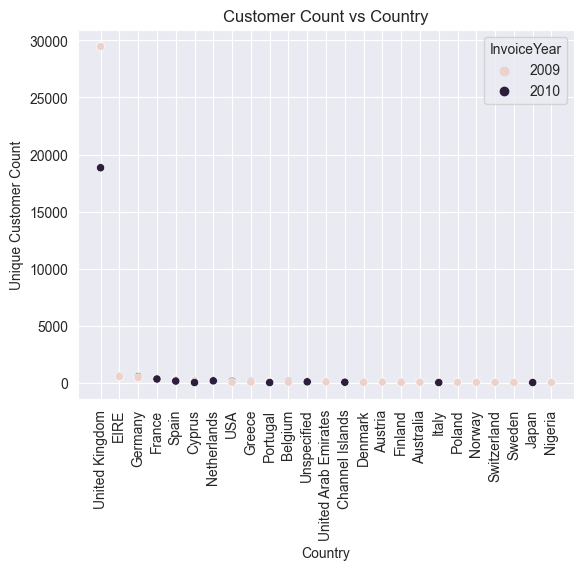

In [6]:
# Distribution of customers by country
customerid_vs_country = sns.scatterplot(x = 'Country', y = 'Customer ID', hue = 'InvoiceYear', data = customerid_country)
customerid_vs_country.set_xlabel('Country')
customerid_vs_country.set_ylabel('Unique Customer Count')
customerid_vs_country.set_title('Customer Count vs Country')
plt.xticks(rotation=90)
plt.plot()

In [7]:

# Tính tổng Doanh thu của từng quốc gia và sắp xếp các quốc gia có Doanh thu cao nhất
country_revenue = retail.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head().reset_index()
country_revenue

,Country,Revenue
0,United Kingdom,1200223.392
1,EIRE,77864.860
2,Netherlands,44417.120
3,Germany,19928.090
4,France,13583.790


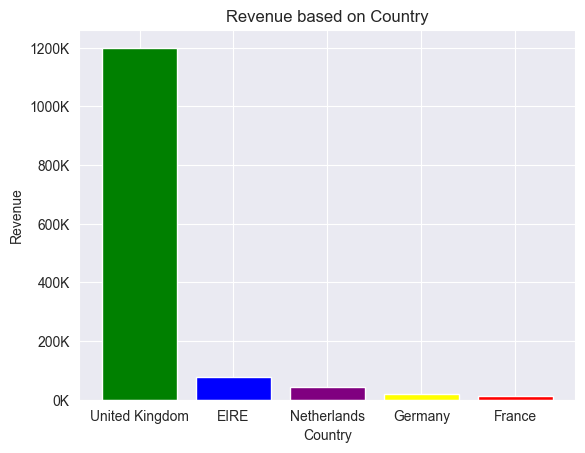

In [8]:
from matplotlib.ticker import FuncFormatter
# Hàm định dạng giá trị trục y
def format_thousands(x, pos):
    return f'{x/1000:.0f}K'
# Vẽ biểu đồ thanh
colors = ['Green', 'Blue', 'Purple', 'Yellow', 'Red']
plt.bar(country_revenue['Country'], country_revenue['Revenue'], color=colors)

# Định dạng trục y theo đơn vị hàng nghìn
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))

plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Revenue based on Country')
plt.show()

In [9]:
# Đếm số lượng và nhóm theo mã khách hàng và quốc gia
customerid_quantity = retail.groupby(['Customer ID', 'Country'])['Quantity'].sum().sort_values(ascending=False).reset_index().head(100)
customerid_quantity

,Customer ID,Country,Quantity
0,13902.0,Denmark,63390
1,13694.0,United Kingdom,47742
2,14156.0,EIRE,32504
3,18102.0,United Kingdom,31020
4,14646.0,Netherlands,30875
...,...,...,...
95,16749.0,United Kingdom,1086
96,14439.0,Greece,1086
97,15738.0,United Kingdom,1067
98,12531.0,Germany,1059


[]

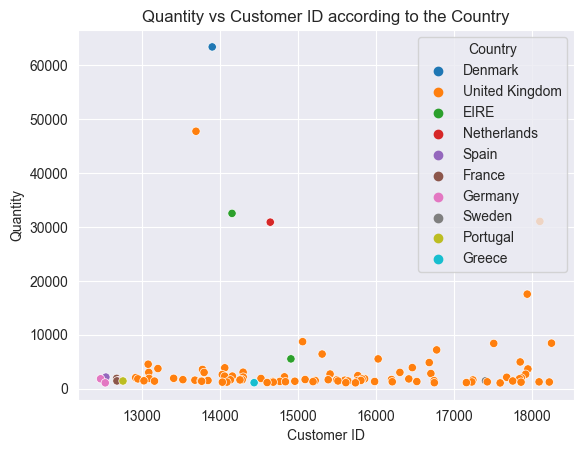

In [10]:
# Tạo biểu đồ phân tán
customerid_vs_quantity = sns.scatterplot(x = 'Customer ID', y = 'Quantity', hue = 'Country', data = customerid_quantity)
customerid_vs_quantity.set_xlabel('Customer ID')
customerid_vs_quantity.set_ylabel('Quantity')
customerid_vs_quantity.set_title('Quantity vs Customer ID according to the Country')
plt.plot()

In [11]:
# Tổng doanh thu của từng ID khách hàng
customerid_revenue = retail.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False).head(10)
customerid_revenue

Customer ID
18102.0    79561.04
14156.0    59798.51
14646.0    43593.79
13694.0    40029.29
17850.0    15480.18
15061.0    14756.02
15311.0    14571.89
14911.0    14469.99
16029.0    13544.52
17511.0    12815.90
Name: Revenue, dtype: float64

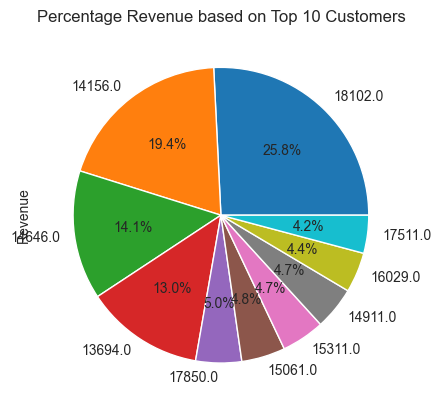

In [12]:
customerid_revenue.plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Percentage Revenue based on Top 10 Customers')
plt.show()

In [13]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74938 entries, 0 to 74937
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Invoice       74938 non-null  object        
 1   StockCode     74938 non-null  object        
 2   Description   74495 non-null  object        
 3   Quantity      74938 non-null  int64         
 4   InvoiceDate   74938 non-null  datetime64[ns]
 5   Price         74938 non-null  float64       
 6   Customer ID   52752 non-null  float64       
 7   Country       74938 non-null  object        
 8   InvoiceYear   74938 non-null  int64         
 9   InvoiceMonth  74938 non-null  int64         
 10  Revenue       74938 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 6.3+ MB


In [14]:
retail.isnull().sum()

Invoice             0
StockCode           0
Description       443
Quantity            0
InvoiceDate         0
Price               0
Customer ID     22186
Country             0
InvoiceYear         0
InvoiceMonth        0
Revenue             0
dtype: int64

In [15]:
retail = retail[retail['Customer ID'].notnull()]

In [16]:
retail.isnull().sum()

Invoice         0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
Price           0
Customer ID     0
Country         0
InvoiceYear     0
InvoiceMonth    0
Revenue         0
dtype: int64

In [17]:
retail.loc[:, 'Date'] = retail.apply(lambda x: dt.datetime(x.InvoiceDate.year,
                                                           x.InvoiceDate.month,
                                                           x.InvoiceDate.day), axis=1)

In [18]:
dt.datetime.now()

datetime.datetime(2024, 1, 8, 17, 48, 43, 78496)

In [19]:
retail.Date.max()

Timestamp('2010-01-29 00:00:00')

In [20]:
current_date = retail.Date.max() + dt.timedelta(1)
retail['Total Price'] = retail.apply(lambda x: x['Quantity'] * x['Price'], axis=1)

In [21]:
rfm_df = retail.groupby('Customer ID').agg({
    'Date' : (lambda x: (current_date - x.max()).days), # R
    'Invoice' : 'count', # F
    'Total Price' : 'sum' # M
})

In [22]:
rfm_df.head()

,Date,Invoice,Total Price
Customer ID,,,
12346.0,4,10,100.00
12349.0,57,5,-24.15
12358.0,53,17,1429.83
12359.0,45,36,760.69
12361.0,4,7,109.20


In [23]:
np.sum(retail[retail['Customer ID'] == 12346.0]['Quantity'] * retail[retail['Customer ID'] == 12346.0]['Price'])

100.0

In [24]:
current_date - retail[retail['Customer ID'] == 12346.0]['Date'].max()

Timedelta('4 days 00:00:00')

In [25]:
rfm_df.rename({
    'Date' : 'Recency',
    'Invoice' : 'Frequency',
    'Total Price' : 'Monetary'
}, axis=1, inplace=True)

In [26]:
rfm_list = ['R', 'F', 'M']
[rfm_list[i] for i in range(len(rfm_list)) if 'Recency'.find(rfm_list[i]) != -1]

['R']

In [27]:
def bucketing_normalization(df:pd.DataFrame, feature:str, n_buckets:4, bucket_labels:range):
    rfm_list = ['R', 'F', 'M']
    colum_name = [rfm_list[i] for i in range(len(rfm_list)) if feature.find(rfm_list[i]) != -1][0]
    df[colum_name] = pd.qcut(x=df[feature], q=n_buckets, labels=bucket_labels)
    return df

In [28]:
rfm_df = bucketing_normalization(rfm_df, 'Recency', 4, range(4, 0, -1))
rfm_df = bucketing_normalization(rfm_df, 'Frequency', 4, range(1, 5))
rfm_df = bucketing_normalization(rfm_df, 'Monetary', 4, range(1, 5))

In [29]:
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
Customer ID,,,,,,
12346.0,4,10,100.00,4,2,1
12349.0,57,5,-24.15,1,1,1
12358.0,53,17,1429.83,1,2,4
12359.0,45,36,760.69,2,3,4
12361.0,4,7,109.20,4,1,1


K-means

In [30]:
X = rfm_df[['R', 'F', 'M']]


In [31]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300)
kmeans.fit(X)

KMeans(n_clusters=5)

In [32]:
rfm_df['KMeans y_pred'] = kmeans.labels_

In [33]:
np.unique(rfm_df['KMeans y_pred'], return_counts=True)

(array([0, 1, 2, 3, 4]), array([123, 260, 375, 368, 289], dtype=int64))

In [34]:
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,KMeans y_pred
Customer ID,,,,,,,
12346.0,4,10,100.00,4,2,1,4
12349.0,57,5,-24.15,1,1,1,3
12358.0,53,17,1429.83,1,2,4,0
12359.0,45,36,760.69,2,3,4,1
12361.0,4,7,109.20,4,1,1,4


In [35]:
def rfm_rel_labels(model_y_pred:str):
    rfm_list = ['Recency', 'Frequency', 'Monetary']
    fig, axs = plt.subplots(3, 1, figsize=(12, 12))
    items = product(rfm_list, axs)
    for i, item in enumerate(items):
        # (i == 0) --> state 1: Recency and axis 0
        # (i == 4) --> state 5: Frequency and axis 1
        # (i == 8) --> state 9: Monetary and axis 2
        if (i == 0) or (i == 4) or (i == 8):
            item[1].scatter(x=[f'Cluster {clusterNum + 1}' if clusterNum != -1 else 'Outlier Cluster' for clusterNum in
                              rfm_df.sort_values([model_y_pred])[model_y_pred].astype('int')],
                       y=rfm_df.sort_values([model_y_pred])[item[0]], c=rfm_df.sort_values([model_y_pred])[model_y_pred])
            item[1].set_title(model_y_pred, size=14)
            item[1].set_xlabel('The Cluster Number')
            item[1].set_ylabel(item[0])
            plt.tight_layout()
            if model_y_pred == 'DBSCAN y_pred':
                item[1].tick_params(axis='x', labelrotation=90)

In [36]:
class RFMDetails():
  
    def __init__(self, model_y_pred:str, with_average:bool=True, start:int=0):
        self.model_y_pred = model_y_pred
        self.with_average = with_average
        self.start = start
        self.rfm_mean = list()
        self.get_mean_of_rfm()
        self.rfm_mean_df = self.get_rfm_mean_df()


    def get_mean_of_rfm(self):
        if (self.start == 0) or (self.start == -1):
            for i in range(self.start, len(rfm_df[self.model_y_pred].unique()) + self.start):
                if self.with_average == True:
                    print('The RFM dataframe Info:')
                    print(rfm_df[['Recency', 'Frequency', 'Monetary']].describe().T[['count', 'mean', 'std', 'min', 'max']].T,
                                                                                                                           '\n')
                    print(f'The Cluster {i + 1} Info:')
                    print(rfm_df[rfm_df[self.model_y_pred] == i][['Recency', 'Frequency', 'Monetary']].describe().T[['count',
                                                                                                                  'mean',
                                                                                                                  'std',
                                                                                                                  'min',
                                                                                                                  'max']].T,
                                                                                          '\n')
                    access = 1
                    if access == 1:
                        self.rfm_mean.append(rfm_df[rfm_df[self.model_y_pred] == i][['Recency', 'Frequency', 'Monetary']].mean().values)
                        access = 0
                else:
                    access = 1
                    if access == 1:
                        self.rfm_mean.append(rfm_df[rfm_df[self.model_y_pred] == i][['Recency', 'Frequency', 'Monetary']].mean().values)
                        access = 0
        else:
            print('You must set the start parameter with 0 or -1. for more information, please read docstring :)')


    def get_rfm_mean_df(self):
        s1 = [f"Cluster {num + 1}" if num != -1 else 'Outlier Cluster' for num in sorted(rfm_df[self.model_y_pred].unique())]
        s2 = ['mean']
        multi_index = pd.MultiIndex.from_product([s1, s2])
        rfm_mean_df = pd.DataFrame(data=self.rfm_mean, columns=['Recency', 'Frequency', 'Monetary'], index=multi_index)
        return rfm_mean_df

In [37]:
rfm_details = RFMDetails('KMeans y_pred', with_average=True, start=0)
rfm_details

The RFM dataframe Info:
           Recency    Frequency      Monetary
count  1415.000000  1415.000000   1415.000000
mean     29.333569    37.280565    831.452560
std      21.464067    59.298442   3307.001464
min       1.000000     1.000000  -1673.410000
max      60.000000   844.000000  79561.040000 

The Cluster 1 Info:
          Recency   Frequency     Monetary
count  123.000000  123.000000   123.000000
mean    30.715447   12.219512   880.237724
std     18.019807    6.801081   851.316327
min      1.000000    1.000000   339.900000
max     59.000000   22.000000  6037.320000 

The RFM dataframe Info:
           Recency    Frequency      Monetary
count  1415.000000  1415.000000   1415.000000
mean     29.333569    37.280565    831.452560
std      21.464067    59.298442   3307.001464
min       1.000000     1.000000  -1673.410000
max      60.000000   844.000000  79561.040000 

The Cluster 2 Info:
          Recency   Frequency     Monetary
count  260.000000  260.000000   260.000000
mean    49

In [38]:
rfm_details.rfm_mean

[array([ 30.71544715,  12.2195122 , 880.23772358]),
 array([ 49.09230769,  47.98846154, 654.81046154]),
 array([   9.11466667,   82.92266667, 2119.07085867]),
 array([ 51.30434783,  10.11956522, 130.35005435]),
 array([  9.2283737 ,  13.67474048, 191.57446367])]

In [39]:
rfm_mean_df = rfm_details.rfm_mean_df
rfm_mean_df

,,Recency,Frequency,Monetary
Cluster 1,mean,30.715447,12.219512,880.237724
Cluster 2,mean,49.092308,47.988462,654.810462
Cluster 3,mean,9.114667,82.922667,2119.070859
Cluster 4,mean,51.304348,10.119565,130.350054
Cluster 5,mean,9.228374,13.674740,191.574464


In [40]:
def stacked_bar_mean(model_y_pred):
    cluster_names = [item[0] for item in rfm_mean_df.index.tolist()]
    r_trace = go.Bar(
        x = cluster_names,
        y = rfm_mean_df['Recency'],
        name = 'Recency'
        )

    f_trace = go.Bar(
        x = cluster_names,
        y = rfm_mean_df['Frequency'],
        name = 'Frequency'
        )

    m_trace = go.Bar(
        x = cluster_names,
        y = rfm_mean_df['Monetary'],
        name = 'Monetary'
        )

    layout = go.Layout(title='The RFM Mean for each Cluster',
                       barmode='stack')

    fig = go.Figure(data=[r_trace, f_trace, m_trace], layout=layout)
    if model_y_pred == 'DBSCAN y_pred':
        fig.update_layout(yaxis_visible=False, xaxis_tickangle=-90)
        fig.show()
    else:
        fig.update_layout(yaxis_visible=False)
        fig.show()

In [41]:
stacked_bar_mean('KMeans y_pred')

phương pháp khuỷu tay

In [42]:
elbow = {}
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    elbow[k] = kmeans.inertia_

In [43]:

point_plot_trace = go.Scatter(
    x = [f'k= {num}' for num in sorted(list(elbow.keys()))],
    y = list(elbow.values()),
    mode = 'markers',
    name = 'Coordinate'
)

line_trace = go.Scatter(
    x = [f'k= {num}' for num in sorted(list(elbow.keys()))],
    y = list(elbow.values()),
    mode = 'lines',
    name = 'WCSS Value'
)

layout = go.Layout(
    title = 'The Elbow Technique Visualization',
    xaxis = dict(title='The number of Clusters'),
    yaxis = dict(title='The WCSS Value')
)

point_plot = go.Figure(data=[line_trace, point_plot_trace], layout=layout)
point_plot.update_layout(xaxis_tickangle=-90)
point_plot.show()

In [44]:
kmeans = KMeans(n_clusters=50, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=50, random_state=0)

In [45]:
np.unique(kmeans.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([ 28,  96,  28,  36,  22,  25,  22,  12,  74,  17,  48,  25,  27,
         67,  45, 104,  47,  52,  33,  27,  54,  38,  30,  14,  34,  25,
         12,  35,  30,  23,  17,  23,  20,  18,  13,  19,  15,  12,  15,
         14,  13,  12,  12,  14,  17,  10,  10,  12,  11,   8], dtype=int64))

In [46]:
rfm_df['KMeans y_pred'] = kmeans.labels_

In [47]:

print(silhouette_score(X=X, labels=rfm_df['KMeans y_pred']))

0.9390292583386687


DBScan

In [48]:
dbscan = DBSCAN(eps=.5, min_samples=5)
dbscan.fit(X)

DBSCAN()

In [49]:
rfm_df['DBSCAN y_pred'] =dbscan.labels_

In [50]:
np.unique(rfm_df['DBSCAN y_pred'], return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54, 55], dtype=int64),
 array([ 24,   6,  96,   5,  25,  54,  34,  74,  67, 104,  22,  23,  30,
         38,  20,  21,  25,  22,  47,   5,  52,  48,  17,  15,  11,  36,
         10,  12,  45,   6,   7,   7,  28,  33,  12,  17,  23,  14,   6,
         10,  12,  35,  12,  20,  14,  27,  19,   5,  27,   8,  12,  12,
         22,  13,   6,  14,   6], dtype=int64))

In [51]:
rfm_details = RFMDetails('DBSCAN y_pred', with_average=False, start=-1)
rfm_details

In [52]:
rfm_mean_df = rfm_details.rfm_mean_df
rfm_mean_df

,,Recency,Frequency,Monetary
Outlier Cluster,mean,32.041667,33.166667,799.417500
Cluster 1,mean,2.833333,13.000000,112.156667
Cluster 2,mean,56.468750,3.312500,17.094792
Cluster 3,mean,55.000000,16.400000,958.776000
Cluster 4,mean,44.080000,30.440000,1192.892000
Cluster 5,mean,3.814815,2.388889,33.444444
Cluster 6,mean,16.352941,34.470588,1709.327647
Cluster 7,mean,14.418919,106.472973,3125.932027
Cluster 8,mean,45.597015,3.731343,45.846119
Cluster 9,mean,3.682692,142.846154,3700.706548


In [53]:
rfm_df[rfm_df["DBSCAN y_pred"] == -1][['Recency', 'Frequency', 'Monetary']].mean()

Recency       32.041667
Frequency     33.166667
Monetary     799.417500
dtype: float64

In [54]:
stacked_bar_mean('DBSCAN y_pred')

In [55]:
print(silhouette_score(X=X, labels=rfm_df['DBSCAN y_pred']))

0.9719222955802724


MiniBatchKMeans

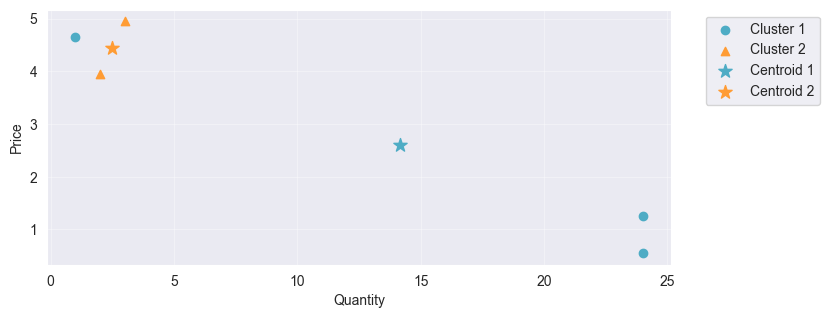

In [58]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics.pairwise import pairwise_distances_argmin

df=pd.read_excel('online_retail_II.xlsx')
# Chọn ngẫu nhiên các điểm từ dữ liệu
X_sample = df.sample(n=10, random_state=10)[['Quantity', 'Price', 'Customer ID']]

# Xử lý giá trị thiếu bằng cách điền NaN bằng giá trị trung bình của mỗi cột
imputer = SimpleImputer(strategy='mean')
X_cleaned = imputer.fit_transform(X_sample)

# MiniBatchKMeans
mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=3,
    batch_size=4,
    n_init=5,
    max_no_improvement=5,
    verbose=0,
)
t0 = time.time()
mbk.fit(X_cleaned)
t_mini_batch = time.time() - t0

# Sắp xếp lại các tâm cụm của MiniBatchKMeans theo thứ tự của tâm cụm KMeans
order = pairwise_distances_argmin(mbk.cluster_centers_, mbk.cluster_centers_)
mbk_ordered_cluster_centers = mbk.cluster_centers_[order]

# Gán nhãn cho các điểm dữ liệu sử dụng các tâm cụm đã được sắp xếp
mbk_labels = pairwise_distances_argmin(X_cleaned, mbk_ordered_cluster_centers)

# Vẽ đồ thị
fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.2, right=0.98, bottom=0.05, top=0.9)

# Thêm lưới kẻ
plt.grid(which="both", linewidth=0.5, alpha=0.5)

# Đặt nhãn cho trục x và trục y
plt.xlabel("Quantity")
plt.ylabel("Price")

# Chọn marker và màu sắc cho các cụm
markers = ["o", "^", "x"]
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

# Vẽ các điểm dữ liệu
for k, col, marker in zip(range(2), colors, markers):
    my_members = mbk_labels == k
    cluster_center = mbk_ordered_cluster_centers[k]
    plt.scatter(X_cleaned[my_members, 0], X_cleaned[my_members, 1], c=col, marker=marker, label=f'Cluster {k + 1}')

# Vẽ các tâm cụm
for k, col in zip(range(2), colors):
    plt.scatter(mbk_ordered_cluster_centers[k, 0], mbk_ordered_cluster_centers[k, 1], c=col, marker="*", s=100, label=f'Centroid {k + 1}')

# Hiển thị chú thích của cụm và tâm cụm
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))

plt.show()


In [61]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Đánh giá silhouette score
silhouette_avg = silhouette_score(X_cleaned, mbk_labels)
print(f" {silhouette_avg}")


 0.7519034188597568
